In [3]:
from visualizations import *
from graphs import *

# Part 1. Visualize Attention

## 1.1. Choose a Model to Load
### Load MNIST Model

In [7]:
modelpath = "../saved/models/paper_mnist_model.pt" #path to the saved model
modeltype = "mnist" #type of model: 'mnist' or 'coco'
n = 2 #number of objects
strength = 0.2 #strength of attention
net, runner, test_loader = load_model_and_data(modelpath, n = n, strength = strength, modeltype = modeltype)

MNIST Object Based Attention Model v2
../mnist
Data Loaded:
	Training Samples:  42000
	Validation Samples:  18000
	Testing Samples:  10000
	Objects:  2 	Strength:  0.2 	Noise:  0.3 	Resample:  True


### ... OR Load COCO Model

In [65]:
modelpath = "../saved/models/paper_coco_model.pt" #path to the saved model
modeltype = "coco" #type of model: 'mnist' or 'coco'
cocoroot = '../../../../data/jordanlei/coco/images/val2017' #path to the coco val dataset
annpath = '../../../../data/jordanlei/coco/annotations/instances_val2017.json' #path to the coco val annotations
metadatapath = '../data/metadata/cocometadata_test.p' #path to metadata file (will create one if none exists)

n = 2 #number of objects
strength = 0.9 #strength of attention
net, runner, test_loader = load_model_and_data(modelpath, n = n, strength = strength, modeltype = modeltype,\
                                               cocoroot = cocoroot, annpath = annpath, metadatapath = metadatapath)

COCO Object-Based Attention Model v2
loading annotations into memory...
Done (t=0.64s)
creating index...
index created!


## Step 1.2 Show Images

INPUT IMAGE


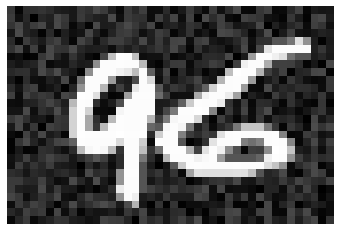

PHASE 1
	masked input


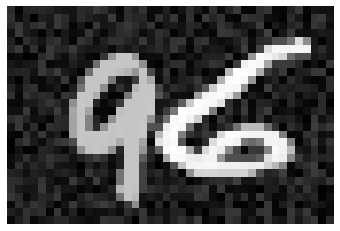

	attention mask


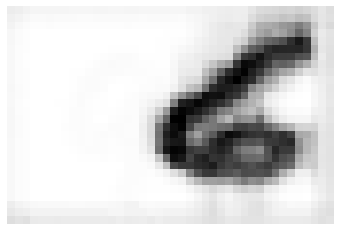

	IOR (for next phase)


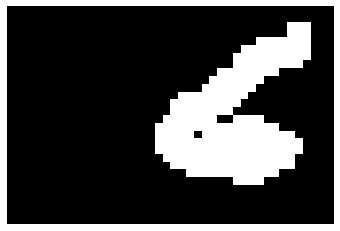

PHASE 2
	masked input


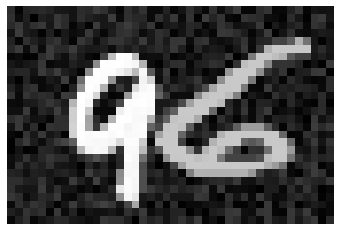

	attention mask


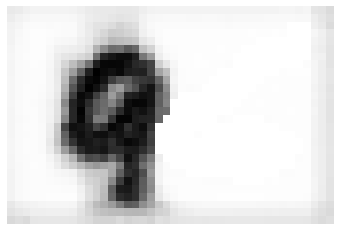

	IOR (for next phase)


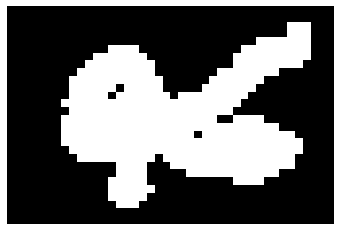

In [18]:
for i, (x, data, labels) in enumerate(test_loader):
    print("INPUT IMAGE")
    toshow(x[0].detach().cpu().numpy())
    masks, hiddens, ior = runner.visualize(x, data, labels)
    
    for j, mask in enumerate(masks): 
        hidden = hiddens[j]
        ior_mask = ior[j]
        
        print("PHASE %s"%(j + 1))
        print("\tmasked input")
        toshow(mask[0])
        print("\tattention mask")
        toshow(hidden[0])
        print("\tIOR (for next phase)")
        toshow(ior_mask[0] * 1.0)
    break

# Part 2. Plot Graphs

In [4]:
metric_files = ["model2.csv", "model3.csv", "model4.csv", "model5.csv"]

In [5]:
df = files_to_df(metric_files)
df.groupby(["lr","penalty"])["final_acc"].mean().unstack()

penalty,0.0,10.0,100.0,1000.0,10000.0
lr,,,,,
0.00001,0.648317,0.685928,0.719317,0.571106,0.161444
0.00010,0.963317,0.941128,0.961456,0.948428,0.782511
0.00100,0.948606,0.880111,0.963994,0.976278,0.966989
0.01000,0.109061,0.185172,0.113444,0.216433,0.226917


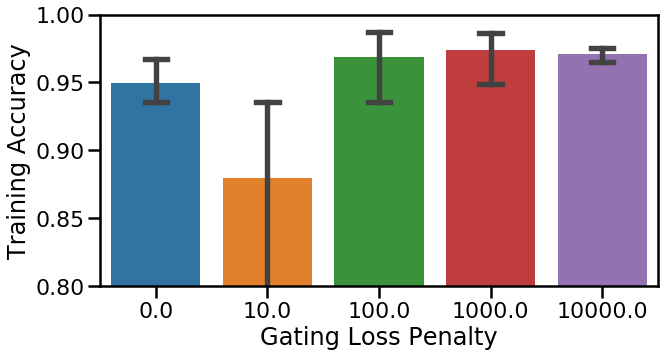

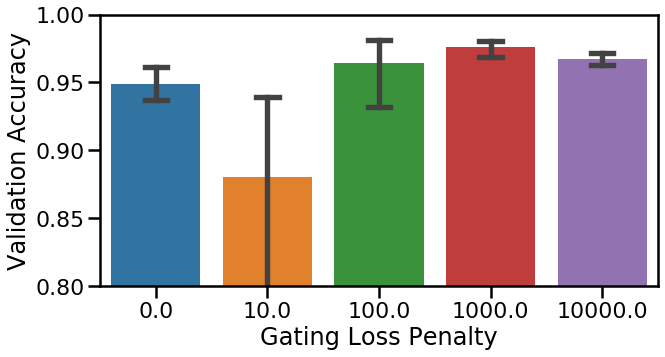

In [6]:
df = df[df["lr"] == 0.001]
plot_boxplots(df, save = False)